<a href="https://colab.research.google.com/github/ymsang/AI_projects/blob/main/vgames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video Games Data analysis

목적: 
- 다음 분기에 어떤 게임을 설계해야 할까

알아야 하는것: 
- 트랜드 파악 (장르, 년도별, sales)
- 장르에 대한 hypothesis? 통계? - 선택한 게임이 인기가 있을지? 

필수: 
1. 지역에 따라서 선호하는 게임 장르가 다를까 
2. 연도별 게임의 트렌드가 있을까 
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

추가 분석하고자 하는 것: 
- let's see

과정: 


In [39]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
import seaborn as sns

# read data as df
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv('vgames2.csv', index_col=0)
df



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


전처리 해야 하는 부분
- missingdata
- 년도 missing, or shortened
- sales M, K


In [40]:
#erase M

df['NA_Sales'] = df['NA_Sales'].str.replace("M","")
df['EU_Sales'] = df['EU_Sales'].str.replace("M","")
df['JP_Sales'] = df['JP_Sales'].str.replace("M","")
df['Other_Sales'] = df['Other_Sales'].str.replace("M","")

#df.dtypes 

In [41]:
def value_to_float(x):  #erase K and divide by 1000
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            x= float(x.replace('K', '')) / 1000
    return float(x)

#tesing with NA
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)

In [42]:
df.iloc[5296] #value is correct

Name               Forza Motorsport 5
Platform                         XOne
Year                             2013
Genre                          Racing
Publisher      Microsoft Game Studios
NA_Sales                         1.21
EU_Sales                         0.78
JP_Sales                         0.01
Other_Sales                      0.17
Name: 5297, dtype: object

In [43]:
#apply to other sales column
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [44]:
df.iloc[5296] #value is correct

Name               Forza Motorsport 5
Platform                         XOne
Year                             2013
Genre                          Racing
Publisher      Microsoft Game Studios
NA_Sales                         1.21
EU_Sales                         0.78
JP_Sales                         0.01
Other_Sales                      0.17
Name: 5297, dtype: object

In [45]:
df.dtypes #sales float 로 변경 확인

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

현재까지: 
- df upload
- sales 를 million 값으로 모두 처리
- null 요약: 
    - Year: 271
    - Genre: 50
    - Publisher: 58

In [46]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [47]:
def clean_year(x):
    if x < 20:
        x = x + 2000
    else:
        if 60 < x < 99:
            x = x + 1900
    return x

#fix 2-digit data and change to int or float
df['Year']= df['Year'].apply(clean_year)


In [48]:
df.iloc[2429] #value is correct

Name              Casper
Platform              PS
Year                1996
Genre          Adventure
Publisher      Interplay
NA_Sales            0.46
EU_Sales            0.31
JP_Sales               0
Other_Sales         0.05
Name: 2430, dtype: object

In [49]:
#fill Nan in 'year' to 0, change to int
df['Year']= df['Year'].fillna(0).astype(int)


#Q1. 지역에 따라서 선호하는 게임 장르가 다를까

진행 순서:
1. genre 종류 파악
2. genre 그룹별로 묶어 means 를 확인
3. 표로 결과 시각화 
4.  


In [50]:
#Genre 종류 보기
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [51]:
#df1= genre + location 
gen_loc = {'Genre': df['Genre'], 'NA': df['NA_Sales'], 'EU': df['EU_Sales'], 'JP': df['JP_Sales'], 'Other': df['Other_Sales']}

df1= pd.DataFrame(data=gen_loc)


In [52]:
#grouby 이용해서 그룹별로 나누기이용해서 그룹별로 나누기

df_genre= df1.groupby('Genre').mean()
df_genre

,NA,EU,JP,Other
Genre,,,,
Action,0.264693,0.157991,0.047776,0.056415
Adventure,0.082547,0.050039,0.040586,0.013133
Fighting,0.263518,0.119504,0.103117,0.043259
Misc,0.235323,0.122468,0.060709,0.042699
Platform,0.505023,0.228066,0.147794,0.058292
Puzzle,0.213408,0.087768,0.098391,0.021661
Racing,0.287361,0.190748,0.045374,0.062027
Role-Playing,0.215469,0.123790,0.232603,0.038409
Shooter,0.444893,0.239335,0.029266,0.078479


In [53]:
#sns 시각화를 위해 tidy 형태로 변형
tidy_genre = df_genre.reset_index()
tidy_genre= tidy_genre.melt(id_vars = 'Genre', value_vars = ['NA', 'EU', 'JP', 'Other'])
tidy_genre

,Genre,variable,value
0,Action,NA,0.264693
1,Adventure,NA,0.082547
2,Fighting,NA,0.263518
3,Misc,NA,0.235323
4,Platform,NA,0.505023
5,Puzzle,NA,0.213408
6,Racing,NA,0.287361
7,Role-Playing,NA,0.215469
8,Shooter,NA,0.444893
9,Simulation,NA,0.211514


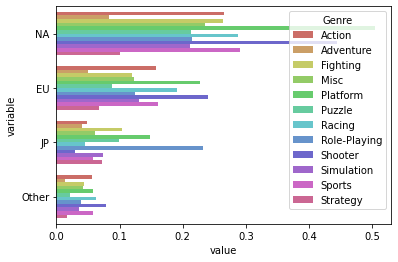

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
#barplot
sns.barplot(x= 'value', y= 'variable', hue= 'Genre', palette = 'hls', data=tidy_genre)
plt.show()
# g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")

In [55]:
#top 5 for each region
NA_genre_list= df_genre.nlargest(5, 'NA'). drop(['EU', 'JP', 'Other'], axis=1)
print(NA_genre_list)
EU_genre_list= df_genre.nlargest(5, 'EU'). drop(['NA', 'JP', 'Other'], axis=1)
print(EU_genre_list)
JP_genre_list= df_genre.nlargest(5, 'JP'). drop(['NA', 'EU', 'Other'], axis=1)
print(JP_genre_list)
Other_genre_list= df_genre.nlargest(5, 'Other'). drop(['NA', 'EU', 'JP'], axis=1)
print(Other_genre_list)

                NA
Genre             
Platform  0.505023
Shooter   0.444893
Sports    0.290696
Racing    0.287361
Action    0.264693
                EU
Genre             
Shooter   0.239335
Platform  0.228066
Racing    0.190748
Sports    0.160820
Action    0.157991
                    JP
Genre                 
Role-Playing  0.232603
Platform      0.147794
Fighting      0.103117
Puzzle        0.098391
Simulation    0.073642
             Other
Genre             
Shooter   0.078479
Racing    0.062027
Platform  0.058292
Sports    0.057527
Action    0.056415


##Findings: 
- 북미에서는 Platform, Shooter, sports, racing action 순으로 많이 팔렸다. 
- Europe 에서는 1위가 Shooter 이며 shooter>platform>racing>sports>action 순이였다 
- 일본에서는 특이하게 Role-playing 이 1위로 나타났다. 그 다음 순위는 platform, fighting, puzzle, simulation 으로 북미와 유럽에 비해 싸움과 액션보다는 시뮬레이션, 퍼즐 위주의 게임이 많이 팔림을 볼 수 있다. 
- 그 외 Other 에서는 shooter 이 가장 많이 팔렸으며 그 이후는 racing, platform, sports, action 등으로 북미와 유럽의 최고 5순위와 비슷했다. 

#Q2. 연도별 게임의 트렌드가 있을까 
- year vs genre

In [56]:
#df2= year+ genre
year_genre = {'Year2': df['Year'], 'Genre2': df['Genre'], 'Count': 1 }

df2= pd.DataFrame(data=year_genre)
df2

,Year2,Genre2,Count
1,2008,Action,1
2,2009,Action,1
3,2010,Adventure,1
4,2010,Misc,1
5,2010,Platform,1
...,...,...,...
16594,2006,Platform,1
16595,2005,Action,1
16596,2015,Sports,1
16597,2013,Action,1


In [57]:
#rid null values
df2=df2.dropna()
df2 = df2.loc[(df2[['Year2']] != 0).all(axis=1)]  #drop row with year:0


In [58]:
df2_tidy= df2.groupby(['Year2', 'Genre2'], as_index=False)['Count'].count()
df2_tidy

,Year2,Genre2,Count
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1981,Action,25
...,...,...,...
383,2016,Sports,38
384,2016,Strategy,10
385,2017,Action,1
386,2017,Role-Playing,2


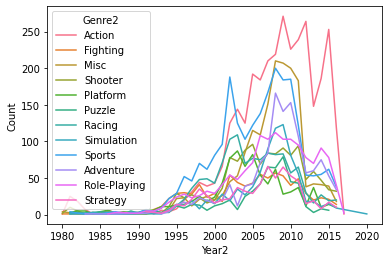

In [59]:
#lineplot
sns.lineplot(x='Year2', y='Count', hue= 'Genre2', data=df2_tidy)

In [60]:
top_year= df2_tidy.nlargest(50, 'Count')
print(top_year)

     Year2        Genre2  Count
290   2009        Action    271
326   2012        Action    264
362   2015        Action    253
314   2011        Action    239
302   2010        Action    226
278   2008        Action    219
266   2007        Action    210
281   2008          Misc    210
293   2009          Misc    207
288   2008        Sports    200
305   2010          Misc    200
242   2005        Action    192
216   2002        Sports    188
350   2014        Action    186
312   2010        Sports    185
254   2006        Action    184
300   2009        Sports    184
317   2011          Misc    183
276   2007        Sports    167
279   2008     Adventure    166
303   2010     Adventure    153
269   2007          Misc    151
338   2013        Action    148
218   2003        Action    144
291   2009     Adventure    141
264   2006        Sports    138
206   2002        Action    125
228   2003        Sports    125
230   2004        Action    125
299   2009    Simulation    123
252   20

##Findings: 

- 2005년도부터 2015년까지 Action 장르가 가장 많이 출시됨
- Simulation 은 1995 부터 2000초반까지 가장 많이 출기가 되었다가 Action 게임으로 2위로 밀려났음
- 2010년도 초반까지는 Action과 simulation 이 가장 많은 출시를 보였지만 2010년도 초반부터 role-playing 이 simulation장르를 앞서나가고 있음 

#Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
1. find top 10 games 
- check for each location (NA, EU, JP, Other)- maybe
2. top10 게임들의 장르, 플랫폼, 회사, 년도(?) 분석
3. find:
 - 어느 플랫폼을 선호하는지
 - 어느 회사가 인기 게임을 만드는지
 - sales 는 Pc이용해서 하나로 통합


In [84]:
import numpy as np
#find total sales number 
df['Total_Sales']= df['EU_Sales']+ df['JP_Sales'] + df['Other_Sales']+ df['NA_Sales']
df

#find top 10 sales games
top_ten= df.nlargest(10, 'Total_Sales')
top_ten.rename_axis('id').reset_index()



,id,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales,Total_Sales
0,2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
1,4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
2,12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,35.83
3,3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
4,7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,31.38
5,1204,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,30.26
6,6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,30.01
7,3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,29.01
8,16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,28.61
9,10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,28.31


In [85]:
#top ten after 2000

top_ten2= df.where(df['Year']>=2000)
top_ten2= top_ten2.nlargest(10, 'Total_Sales')
top_ten2.rename_axis('id').reset_index()

,id,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales,Total_Sales
0,2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
1,12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,35.83
2,3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
3,6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,30.01
4,3015,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,29.01
5,16532,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,28.61
6,11138,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75,24.75
7,10651,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43,23.43
8,3436,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,22.72
9,10900,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,22.00


##Findings: 

- 우선 전체 중 top 10 sales 와 2000년도 이후 출고된 게임의 top ten을 비교하였다 
- 전체와 2000년이후 게임 비교결과 가장 많은 sales를 기록한 게임회사는 Nintendo 였다. 



#Extra: Sales 숫자로 얻을 수 있는건 없을까? 

In [81]:
#sales DataFrame
#sales dic
sales= {'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'}

sales_df= pd.DataFrame(top_ten, columns= sales)
sales_df


,JP_Sales,Other_Sales,Total_Sales,NA_Sales,EU_Sales
2909,3.77,8.46,82.74,41.49,29.02
4200,6.81,0.77,40.24,29.08,3.58
12580,3.79,3.31,35.83,15.85,12.88
3353,3.28,2.96,33.00,15.75,11.01
7830,10.22,1.00,31.38,11.27,8.89
1204,4.22,0.58,30.26,23.20,2.26
6938,6.50,2.90,30.01,11.38,9.23
3015,2.93,2.85,29.01,14.03,9.20
16532,4.70,2.26,28.61,14.59,7.06
10489,0.28,0.47,28.31,26.93,0.63
